Step 1: Problem statement
Obesity is a serious and chronic disease, Obesity can lead to type 2 diabetes, heart disease, and some cancers. A healthy diet and regular physical activity help people achieve and maintain a healthy weight starting at an early age and continuing throughout life. 

In [3]:
# Import python packages that we are using

import numpy as np # mathematical computations, linear algebra
import pandas as pd # import data libraries, read csv file
import matplotlib.pyplot as plt # interactive visualizations
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px


In [12]:
# Read data

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv").dropna()

# Add a column 'obese'.  If 'NObeyesdad'= 'Normal_Weight' then obese = False, else true. 
df['obese'] = np.where(df['NObeyesdad']!= 'Normal_Weight', True, False)
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,obese
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,False
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,False
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,True
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,True


In [5]:
df.shape
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='obese', ylabel='Density'>

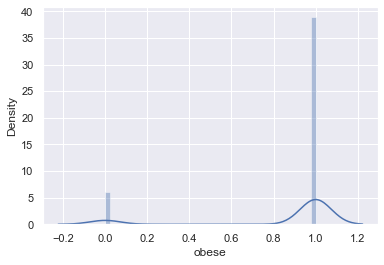

In [78]:
# Explore data
sns.distplot(df['obese'])

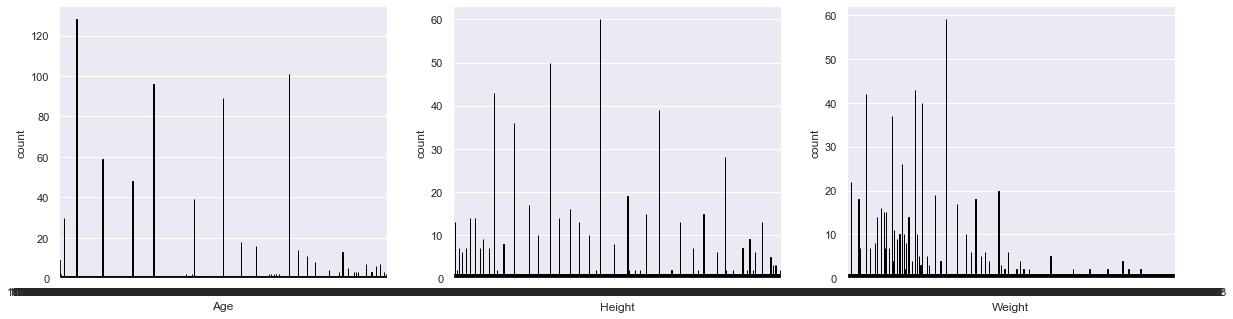

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x= 'Age', data = df, palette="colorblind",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Height', data = df, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'Weight', data = df, palette="Greens_r",edgecolor="black")
plt.show()

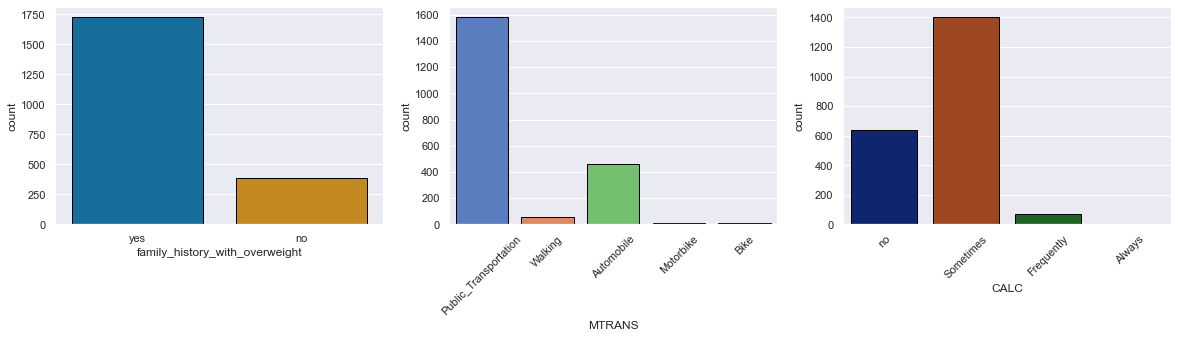

In [80]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="colorblind",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = df, palette="muted",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="dark",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

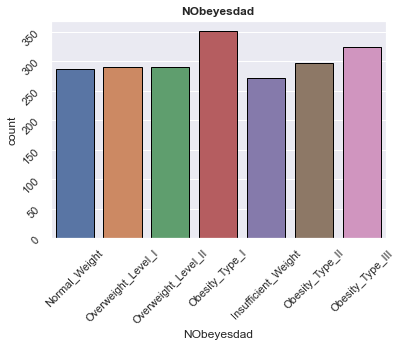

In [81]:
sns.countplot(x="NObeyesdad",data=df,palette="deep",edgecolor="black")
plt.title('NObeyesdad', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functio

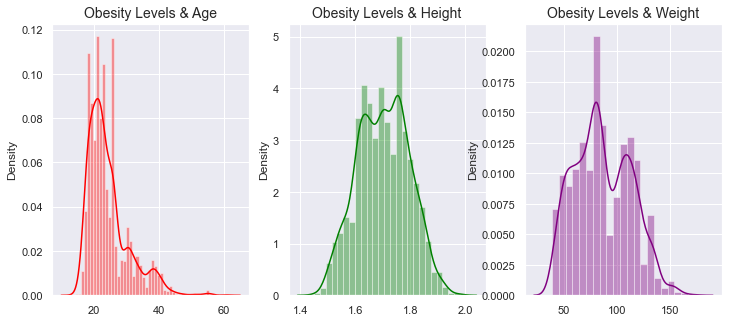

In [82]:
# Distribution of different Obesity levels and Age, Height and Weight
fig , ax = plt.subplots(1,3,figsize = (12,5))

Age = df.Age.values
Height= df.Height.values
Weight = df.Weight.values

sns.distplot(Age , ax = ax[0] , color = 'red').set_title('Obesity Levels & Age' , fontsize = 14)
sns.distplot(Height , ax = ax[1] , color = 'green').set_title('Obesity Levels & Height' , fontsize = 14)
sns.distplot(Weight , ax = ax[2] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.show()

In [83]:
# Train Data set